In [174]:
from config import OMDB_API

In [175]:
import requests
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors #https://matplotlib.org/stable/gallery/color/named_colors.html
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns

#### Movie Friends Analysis

In [176]:
url="http://www.omdbapi.com/?t=friends&plot=full&apikey="+OMDB_API

In [177]:
url

'http://www.omdbapi.com/?t=friends&plot=full&apikey=4c77845d'

In [178]:
response=requests.get(url).json() #to turn json format 

In [179]:
response

{'Title': 'Friends',
 'Year': '1994–2004',
 'Rated': 'TV-14',
 'Released': '22 Sep 1994',
 'Runtime': '22 min',
 'Genre': 'Comedy, Romance',
 'Director': 'N/A',
 'Writer': 'David Crane, Marta Kauffman',
 'Actors': 'Jennifer Aniston, Courteney Cox, Lisa Kudrow',
 'Plot': 'Ross Geller, Rachel Green, Monica Geller, Joey Tribbiani, Chandler Bing, and Phoebe Buffay are six twenty-somethings living in New York City. Over the course of 10 years and seasons, these friends go through life lessons, family, love, drama, friendship, and comedy.',
 'Language': 'English, Spanish, Italian, French, Dutch, Hebrew',
 'Country': 'United States',
 'Awards': 'Won 6 Primetime Emmys. 79 wins & 231 nominations total',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BNDVkYjU0MzctMWRmZi00NTkxLTgwZWEtOWVhYjZlYjllYmU4XkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.9/10'}],
 'Metascore': 'N/A',
 'imdbRating': '8.9',
 'imdbVotes': '1,060,958',
 'imdbID'

Analyze by methods

In [180]:
def get_movie_friends(response):
    all_data = []

    for item in response:
        data = {'Title': response['Title'],
                'Year': response['Year'],
                'Realeased Date':response['Released'],
                'Movie Type': response['Genre'],
                'Actors': response['Actors'],
                'totalSeasons': response['totalSeasons'],
                'Language': response['Language'],
        }
        all_data.append(data)
    return pd.DataFrame(all_data)

In [181]:
movie_ids=get_movie_friends(response)

In [182]:
movie_ids.head(1)

,Title,Year,Realeased Date,Movie Type,Actors,totalSeasons,Language
0,Friends,1994–2004,22 Sep 1994,"Comedy, Romance","Jennifer Aniston, Courteney Cox, Lisa Kudrow",10,"English, Spanish, Italian, French, Dutch, Hebrew"


In [183]:
movie_ids["Actors"]=movie_ids["Actors"].str.split(",")

In [184]:
movie_ids = movie_ids.join(movie_ids['Actors'].apply(pd.Series).add_prefix('Actor'))

In [185]:
movie_ids["Language"]=movie_ids["Language"].str.split(",")

In [186]:
movie_ids = movie_ids.join(movie_ids['Language'].apply(pd.Series).add_prefix('Language'))

In [187]:
movie_ids.head(1).T

,0
Title,Friends
Year,1994–2004
Realeased Date,22 Sep 1994
Movie Type,"Comedy, Romance"
Actors,"[Jennifer Aniston, Courteney Cox, Lisa Kudrow]"
totalSeasons,10
Language,"[English, Spanish, Italian, French, Dutch,..."
Actor0,Jennifer Aniston
Actor1,Courteney Cox
Actor2,Lisa Kudrow


In [188]:
movie_ids.drop(columns=["Actors","Language"]).head(1).T

,0
Title,Friends
Year,1994–2004
Realeased Date,22 Sep 1994
Movie Type,"Comedy, Romance"
totalSeasons,10
Actor0,Jennifer Aniston
Actor1,Courteney Cox
Actor2,Lisa Kudrow
Language0,English
Language1,Spanish


#### All Friend Movies that have name Friends and Season 1

In [189]:
url1="http://www.omdbapi.com/?t=friends&Season=1&apikey="+OMDB_API

In [190]:
response1=requests.get(url1).json() #to turn json format 

In [191]:
response1

{'Title': 'Friends',
 'Season': '1',
 'totalSeasons': '10',
 'Episodes': [{'Title': 'The One Where Monica Gets a Roommate',
   'Released': '1994-09-22',
   'Episode': '1',
   'imdbRating': '8.1',
   'imdbID': 'tt0583459'},
  {'Title': 'The One with the Sonogram at the End',
   'Released': '1994-09-29',
   'Episode': '2',
   'imdbRating': '7.9',
   'imdbID': 'tt0583647'},
  {'Title': 'The One with the Thumb',
   'Released': '1994-10-06',
   'Episode': '3',
   'imdbRating': '8.0',
   'imdbID': 'tt0583653'},
  {'Title': 'The One with George Stephanopoulos',
   'Released': '1994-10-13',
   'Episode': '4',
   'imdbRating': '7.9',
   'imdbID': 'tt0583521'},
  {'Title': 'The One with the East German Laundry Detergent',
   'Released': '1994-10-20',
   'Episode': '5',
   'imdbRating': '8.3',
   'imdbID': 'tt0583599'},
  {'Title': 'The One with the Butt',
   'Released': '1994-10-27',
   'Episode': '6',
   'imdbRating': '8.0',
   'imdbID': 'tt0583585'},
  {'Title': 'The One with the Blackout',
  

 Analyze by Method

In [192]:
def get_films_friends(response1):
    all_data = []

    for item in response1["Episodes"]:
        data = {'Released': item['Released'],
                'imdbRating': item['imdbRating'],
                'imdbID Date':item['imdbID'],
                'Title':item['Title'],
                'Episode':item['Episode'],
        }
        all_data.append(data)
    return pd.DataFrame(all_data)

In [193]:
film_ids=get_films_friends(response1)

In [194]:
film_ids

,Released,imdbRating,imdbID Date,Title,Episode
0,1994-09-22,8.1,tt0583459,The One Where Monica Gets a Roommate,1
1,1994-09-29,7.9,tt0583647,The One with the Sonogram at the End,2
2,1994-10-06,8.0,tt0583653,The One with the Thumb,3
3,1994-10-13,7.9,tt0583521,The One with George Stephanopoulos,4
4,1994-10-20,8.3,tt0583599,The One with the East German Laundry Detergent,5
5,1994-10-27,8.0,tt0583585,The One with the Butt,6
6,1994-11-03,8.9,tt0583579,The One with the Blackout,7
7,1994-11-10,7.9,tt0583462,The One Where Nana Dies Twice,8
8,1994-11-17,8.1,tt0583492,The One Where Underdog Gets Away,9
9,1994-12-15,7.9,tt0583630,The One with the Monkey,10


In [195]:
film_ids=film_ids.sort_values(by=['imdbRating'])

In [196]:
film_ids

,Released,imdbRating,imdbID Date,Title,Episode
20,1995-04-27,7.6,tt0583603,The One with the Fake Monica,21
19,1995-04-06,7.7,tt0583602,The One with the Evil Orthodontist,20
1,1994-09-29,7.9,tt0583647,The One with the Sonogram at the End,2
3,1994-10-13,7.9,tt0583521,The One with George Stephanopoulos,4
7,1994-11-10,7.9,tt0583462,The One Where Nana Dies Twice,8
18,1995-03-09,7.9,tt0583493,The One Where the Monkey Gets Away,19
9,1994-12-15,7.9,tt0583630,The One with the Monkey,10
11,1995-01-12,8.0,tt0583598,The One with the Dozen Lasagnas,12
2,1994-10-06,8.0,tt0583653,The One with the Thumb,3
5,1994-10-27,8.0,tt0583585,The One with the Butt,6


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Friends Movie Season 1 Imdb')

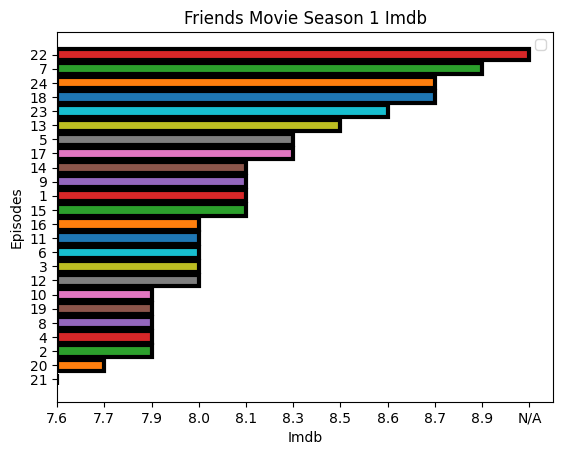

In [197]:

plt.barh(y=film_ids.Episode,
         width=film_ids.imdbRating,
         color=mcolors.TABLEAU_COLORS, #https://matplotlib.org/stable/gallery/color/named_colors.html
         edgecolor='black',
         linewidth=3,
         )
#to see details of the graph, we should use matplotlib library
plt.legend()
plt.xlabel('Imdb')
plt.ylabel('Episodes')
plt.title('Friends Movie Season 1 Imdb')